In [2]:
import sys
sys.path.append('../../')

import numpy as np

from helper import *

In [3]:
def exp_decay(epoch, initial_lrate):
  return math.exp(-0.05 * (epoch + 10)) * initial_lrate

In [4]:
class minibatch_momentum:
    def mse_loss(self, x):
        y_pred = np.dot(self.X, x[0])
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        X_batch = self.X[indices, :]
        y_batch = self.y[indices]

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.dot(X_batch, x)
        grad = 2 * np.dot(X_batch.T, (y_pred - y_batch))

        # Sum values in rows of grad and divide by n
        grad_mean = np.sum(grad, axis=1) / self.batch_size

        return grad_mean
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.001, max_epochs=1000, eps=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling_and_nesterov_moment(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [5]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch_momentum(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(1, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch_momentum(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), lr_scheduling_func=exp_decay, max_epochs=1000, initial_lr=0.0005, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [6]:
def research_minibatch_view(results, start=None, end=None):
    if start is None:
        start = 1
    if end is None:
        end = len(results)

    # График n_epochs
    plt.plot(range(start, end+1), results[start-1:end], marker='o', linewidth=3, markersize=3, label='Minibatch GD Nesterov and lr_scheduling')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    plt.show()

In [7]:
results = research_minibatch_calculation(n_tests=10)

100%|██████████| 500/500 [01:10<00:00,  7.13it/s]


In [8]:
print(results)

[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 907.9, 450.5, 76.7, 58.5, 55.3, 51.0, 46.1, 44.0, 41.7, 39.3, 38.1, 36.3, 34.3, 34.0, 33.7, 31.1, 31.0, 30.5, 29.0, 28.5, 28.2, 27.5, 26.7, 26.7, 25.9, 25.2, 24.7, 24.3, 23.9, 23.4, 23.1, 22.9, 22.2, 21.8, 21.8, 21.4, 21.0, 20.9, 20.7, 20.0, 19.9, 19.7, 19.7, 19.4, 19.4, 19.0, 18.7, 18.8, 18.2, 18.1, 18.0, 17.8, 17.9, 17.4, 17.2, 17.0, 17.1, 17.0, 17.0, 16.9, 16.5, 16.3, 16.3, 16.1, 16.0, 15.9, 15.9, 15.9, 15.4, 15.4, 15.0, 15.1, 14.9, 15.0, 15.0, 14.8, 14.5, 14.7, 14.5, 14.1, 14.3, 14.0, 14.1, 14.2, 14.0, 14.0, 14.0, 13.9, 13.6, 13.5, 13.3, 13.5, 13.5, 13.0, 13.1, 13.0, 12.9, 13.0, 13.0, 12.9, 13.0, 13.0, 12.7, 12.9, 12.9, 12.4, 12.1, 12.1, 12.2, 12.1, 12.2, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.8, 11.9, 11.7, 11.6, 11.5, 11.5, 11.2, 11.1, 11.0,

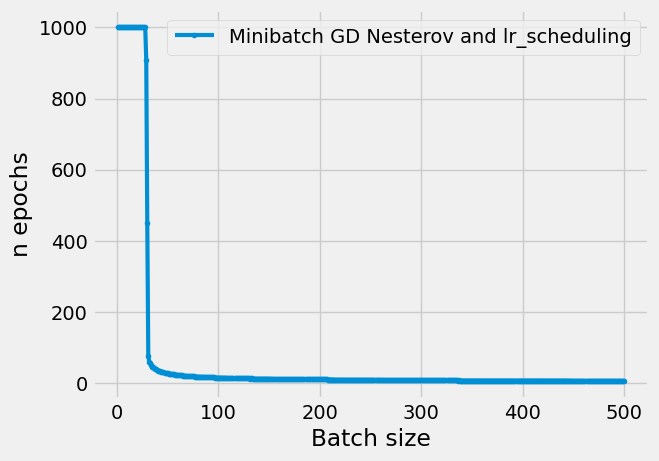

In [9]:
research_minibatch_view(results)

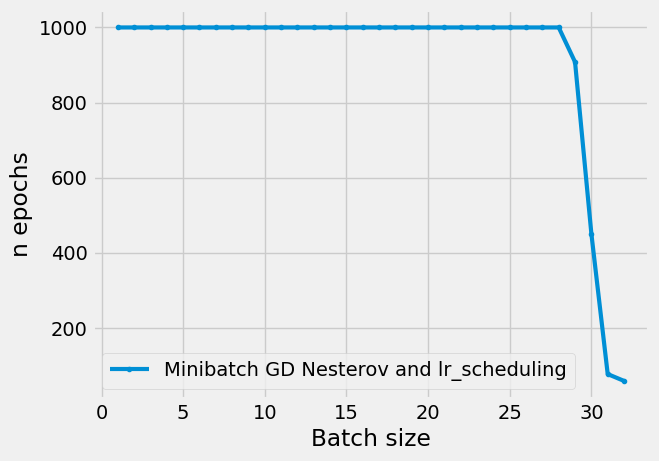

In [10]:
research_minibatch_view(results, 1, 32)

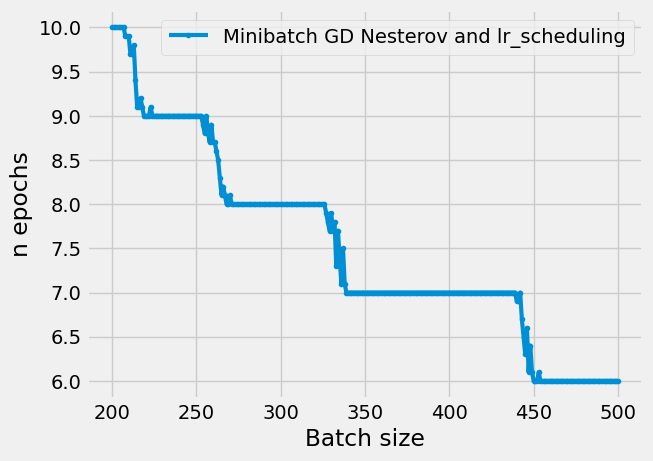

In [11]:
research_minibatch_view(results, 200, 500)